<a href="https://colab.research.google.com/github/ayandahuate/Data-Science-Internship/blob/main/predictiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [4]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# find file path from directory window on the left pane of this file)
file_path = "/content/drive/MyDrive/Data Science Internship/Athletics cohort 2013-2017/Athletics20132017.xlsx"

# read csv into Pandas data from
df = pd.read_excel(file_path)

# show first 5 rows
df.head()

Mounted at /content/drive


,ID_NUM,GENDER,ETHINCITY_RACE_DESCRIPTION,DOB,MAJOR_MINOR_DESC,DEPARTMENT,CAREER_GPA,COHORT,CANDIDACY_TYPE,DTE_DEGR_CONFERRED,EXIT_REASON,EXIT_DATE,athlete,athleteSport
0,290363,M,"White, Non-Hispanic",1995-05-12,Sports Management,BUS,2.64,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN
1,446698,F,"White, Non-Hispanic",1995-07-17,Biochemistry Major,BIO,3.18,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,Y,Tennis--Women
2,446761,M,"White, Non-Hispanic",1995-04-15,Education Curriculum Studies,EDU,2.86,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN
3,447029,M,Asian or Pacific Islander,1995-04-23,Undecided,Undecided,2.71,FALL 2013 FTFT,F,NaT,O,2014-05-08,Y,Soccer--Men
4,447033,M,"White, Non-Hispanic",1994-07-22,Biochemistry Major,BIO,3.94,FALL 2013 FTFT,F,2017-05-13,G,2017-05-13,N,NaN


In [5]:
# Calculate age based on DOB and creating new colum 'AGE'
#creating new column 'COHORT_DATE' based on column "COHORT'

#Function to extract the year and semester from COHORT
def extract_cohort_date(cohort):
    parts = cohort.split()
    year = int(parts[1])
    semester = parts[0]

    if semester == 'FALL':
        return pd.to_datetime(f'09/01/{year}')

# Create a new column 'COHORT_DATE' using the function
df['COHORT_DATE'] = df['COHORT'].apply(extract_cohort_date)

# Display the transformed DataFrame
print(df)

#.astype('<m8[Y]') to convert days to integer years
df['AGE'] = (df['COHORT_DATE'] - df['DOB']).astype('<m8[Y]')

# df with new column age
print(df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [6]:
#new variable GRADUATE based on DTE_DEGR_CONFERRED
df['GRADUATE'] = [1 if not pd.isna(x) else 0 for x in df['DTE_DEGR_CONFERRED']]

print(df)

#1 - graduate
#0 - non gradaute

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [8]:
df.describe()

,ID_NUM,CAREER_GPA,AGE,GRADUATE
count,1.314000e+03,1314.000000,1314.000000,1314.000000
mean,1.041125e+06,2.916956,18.770167,0.589802
std,5.924440e+05,0.917314,1.860437,0.492057
min,2.903630e+05,0.000000,13.000000,0.000000
25%,4.682375e+05,2.480000,18.000000,0.000000
50%,4.796040e+05,3.150000,18.000000,1.000000
75%,1.656001e+06,3.630000,19.000000,1.000000
max,1.723337e+06,4.000000,51.000000,1.000000


In [10]:
#creating new column grouping 'ETHNICITY_RACE_DESCRIPTION'
ethnicity_groups = {
    'White': ['White, Non-Hispanic', 'White'],
    'Nonresident Alien':['Nonresident Alien'],
    'Black or African American':['African-American, Non-Hispanic','Black or African American'],
    'Hispanic':['Hispanic','Hispanics of any race'],
    'American Indian or Alaskan Native':['American Indian or Alaskan Native','American Indian or Alaska Native'],
    'Asian or Pacific Islander':['Asian or Pacific Islander','Asian'],
    'Race/Ethnicity Unknown ':['Race/Ethnicity Unknown','Race and Ethnicity unknown','Unknown','Other','Two or more races']
}

def assign_group(ethnicity):
    for group, ethnicity_in_group in ethnicity_groups.items():
        if ethnicity.lower() in [e.lower() for e in ethnicity_in_group]:
            return group


df['ETHNICITY_RACE_CONCAT'] = df['ETHINCITY_RACE_DESCRIPTION'].apply(assign_group)

# Display the updated DataFrame
print(df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [11]:
#getting counts for each category

# counts for 'GENDER'
gender_counts = df['GENDER'].value_counts()
print("Counts of GENDER:")
print(gender_counts)

# counts for 'ETHNICITY_RACE_DESCRIPTION'
ethnicity_counts = df['ETHINCITY_RACE_DESCRIPTION'].value_counts()
print("\nCounts of ETHNICITY_RACE_DESCRIPTION:")
print(ethnicity_counts)


# counts for ' CANDIDACY_TYPE '

candidacy_counts = df ['CANDIDACY_TYPE'].value_counts()
print("\nCounts of CANDIDACY TYPE:")
print(candidacy_counts)

# counts for 'ETHNICITY_RACE_DESCRIPTION'
ethnicity_counts = df['ETHINCITY_RACE_DESCRIPTION'].value_counts()
print("\nCounts of ETHNICITY_RACE_DESCRIPTION:")
print(ethnicity_counts)


# counts for athletes and non athletes
athlete_counts = df['athlete'].value_counts()
print("\n Counts of athletes and non athletes ")
print(athlete_counts)

# counts for 'athleteSport'
sport_counts = df['athleteSport'].value_counts()
print("\nCounts of Sports:")
print(sport_counts)


# counts for 'DEPARTMENT'
department_counts = df['DEPARTMENT'].value_counts()
print("\nCounts of DEPARTMENT:")
print(department_counts)

# counts for 'AGE'
age_counts = df['AGE'].value_counts()
print("\nCounts of AGE:")
print(age_counts)

# counts for 'AGE'
graduate_counts = df['GRADUATE'].value_counts()
print("\nCounts of GRADUATE:")
print(graduate_counts)


#counts for 'COHORT'
cohort_counts = df['COHORT'].value_counts()
print("\nCounts of COHORT:")
print(cohort_counts)

# counts for 'ETHNICITY_RACE_DESCRIPTION'
ethnicityconc_counts = df['ETHNICITY_RACE_CONCAT'].value_counts()
print("\nCounts of ETHNICITY_RACE_CONCAT:")
print(ethnicityconc_counts)


Counts of GENDER:
M    732
F    582
Name: GENDER, dtype: int64

Counts of ETHNICITY_RACE_DESCRIPTION:
White, Non-Hispanic                  711
White                                227
Nonresident Alien                    138
African-American, Non-Hispanic        86
Hispanic                              40
Black or African American             21
American Indian or Alaskan Native     18
Other                                 16
Asian or Pacific Islander             12
Hispanics of any race                 11
Two or more races                      9
Race/Ethnicity Unknown                 7
Race and Ethnicity unknown             7
Unknown                                6
American Indian or Alaska Native       3
Asian                                  2
Name: ETHINCITY_RACE_DESCRIPTION, dtype: int64

Counts of CANDIDACY TYPE:
F    954
T    179
I    127
1     38
Z      9
2      7
Name: CANDIDACY_TYPE, dtype: int64

Counts of ETHNICITY_RACE_DESCRIPTION:
White, Non-Hispanic                  711

In [12]:
# deleting inacurate age data

df = df[df['AGE'] >= 15]
print(df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [13]:
df.columns

Index(['ID_NUM', 'GENDER', 'ETHINCITY_RACE_DESCRIPTION', 'DOB',
       'MAJOR_MINOR_DESC', 'DEPARTMENT', 'CAREER_GPA', 'COHORT',
       'CANDIDACY_TYPE', 'DTE_DEGR_CONFERRED', 'EXIT_REASON', 'EXIT_DATE',
       'athlete', 'athleteSport', 'COHORT_DATE', 'AGE', 'GRADUATE',
       'ETHNICITY_RACE_CONCAT'],
      dtype='object')

In [38]:
#creating new variable grouping GPAs
 # Define bin edges (GPA)
bin_edges = [0.00, 2.5, 3.0 , 3.6, 3.8,4.00, float('inf')]

# Define bin labels
bin_labels = ['0.00 - 2.50 GPA', '2.50 -3.00 GPA','3.00 - 3.60 GPA', '3.60 - 3.80 GPA ', '3.80 - 4.00 GPA','4.00+']

# Create a new categorical variable 'GPA Group'
df['GPA_GROUP'] = pd.cut(df['CAREER_GPA'], bins=bin_edges, labels=bin_labels, right=False)


print(df)

       ID_NUM GENDER ETHINCITY_RACE_DESCRIPTION        DOB  \
0      290363      M        White, Non-Hispanic 1995-05-12   
1      446698      F        White, Non-Hispanic 1995-07-17   
2      446761      M        White, Non-Hispanic 1995-04-15   
3      447029      M  Asian or Pacific Islander 1995-04-23   
4      447033      M        White, Non-Hispanic 1994-07-22   
...       ...    ...                        ...        ...   
1309  1715933      F  Black or African American 1996-03-18   
1310  1715945      M  Black or African American 1994-07-04   
1311  1715951      M      Hispanics of any race 1994-06-23   
1312  1715953      F                      White 1996-08-07   
1313  1715958      F  Black or African American 1993-07-17   

                  MAJOR_MINOR_DESC DEPARTMENT  CAREER_GPA              COHORT  \
0                Sports Management        BUS        2.64      FALL 2013 FTFT   
1               Biochemistry Major        BIO        3.18      FALL 2013 FTFT   
2     Educat

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 0 to 1313
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID_NUM                      1312 non-null   int64         
 1   GENDER                      1312 non-null   object        
 2   ETHINCITY_RACE_DESCRIPTION  1312 non-null   object        
 3   DOB                         1312 non-null   datetime64[ns]
 4   MAJOR_MINOR_DESC            1312 non-null   object        
 5   DEPARTMENT                  1312 non-null   object        
 6   CAREER_GPA                  1312 non-null   float64       
 7   COHORT                      1312 non-null   object        
 8   CANDIDACY_TYPE              1312 non-null   object        
 9   DTE_DEGR_CONFERRED          775 non-null    datetime64[ns]
 10  EXIT_REASON                 1269 non-null   object        
 11  EXIT_DATE                   1269 non-null   datetime64[n

In [32]:
df.describe()

,ID_NUM,CAREER_GPA,AGE,GRADUATE
count,1.312000e+03,1312.000000,1312.000000,1312.000000
mean,1.040087e+06,2.920549,18.778963,0.590701
std,5.922972e+05,0.913117,1.848144,0.491892
min,2.903630e+05,0.000000,16.000000,0.000000
25%,4.682295e+05,2.480000,18.000000,0.000000
50%,4.795645e+05,3.150000,18.000000,1.000000
75%,1.655821e+06,3.630000,19.000000,1.000000
max,1.715958e+06,4.000000,51.000000,1.000000


PREDICTIVE MODELING , target - Graduate or Not

In [14]:
df_model=df[['AGE','GENDER','DEPARTMENT','CAREER_GPA','COHORT','CANDIDACY_TYPE','athlete','athleteSport','ETHNICITY_RACE_CONCAT','ID_NUM']]
print(df_model)

       AGE GENDER DEPARTMENT  CAREER_GPA              COHORT CANDIDACY_TYPE  \
0     18.0      M        BUS        2.64      FALL 2013 FTFT              F   
1     18.0      F        BIO        3.18      FALL 2013 FTFT              F   
2     18.0      M        EDU        2.86      FALL 2013 FTFT              F   
3     18.0      M  Undecided        2.71      FALL 2013 FTFT              F   
4     19.0      M        BIO        3.94      FALL 2013 FTFT              F   
...    ...    ...        ...         ...                 ...            ...   
1309  21.0      F        BIO        1.99  FALL 2017 TRANSFER              T   
1310  23.0      M  Undecided        0.79  FALL 2017 TRANSFER              T   
1311  23.0      M  Undecided        0.00  FALL 2017 TRANSFER              T   
1312  21.0      F        BUS        3.26  FALL 2017 TRANSFER              T   
1313  24.0      F        POL        3.52  FALL 2017 TRANSFER              T   

     athlete      athleteSport      ETHNICITY_RACE_

In [15]:
df_dum=pd.get_dummies(df_model)
print(df_dum)

       AGE  CAREER_GPA   ID_NUM  GENDER_F  GENDER_M  DEPARTMENT_BIO  \
0     18.0        2.64   290363         0         1               0   
1     18.0        3.18   446698         1         0               1   
2     18.0        2.86   446761         0         1               0   
3     18.0        2.71   447029         0         1               0   
4     19.0        3.94   447033         0         1               1   
...    ...         ...      ...       ...       ...             ...   
1309  21.0        1.99  1715933         1         0               1   
1310  23.0        0.79  1715945         0         1               0   
1311  23.0        0.00  1715951         0         1               0   
1312  21.0        3.26  1715953         1         0               0   
1313  24.0        3.52  1715958         1         0               0   

      DEPARTMENT_BUS  DEPARTMENT_CHM  DEPARTMENT_CLA  DEPARTMENT_COM  ...  \
0                  1               0               0               0  

In [16]:
df_dum.head()

,AGE,CAREER_GPA,ID_NUM,GENDER_F,GENDER_M,DEPARTMENT_BIO,DEPARTMENT_BUS,DEPARTMENT_CHM,DEPARTMENT_CLA,DEPARTMENT_COM,...,athleteSport_Track - Women,athleteSport_Volleyball,athleteSport_Women's Lacrosse,ETHNICITY_RACE_CONCAT_American Indian or Alaskan Native,ETHNICITY_RACE_CONCAT_Asian or Pacific Islander,ETHNICITY_RACE_CONCAT_Black or African American,ETHNICITY_RACE_CONCAT_Hispanic,ETHNICITY_RACE_CONCAT_Nonresident Alien,ETHNICITY_RACE_CONCAT_Race/Ethnicity Unknown,ETHNICITY_RACE_CONCAT_White
0,18.0,2.64,290363,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,18.0,3.18,446698,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18.0,2.86,446761,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,18.0,2.71,447029,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,19.0,3.94,447033,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
#predictors and target variables
X=df_dum
y=df.GRADUATE.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# logist8ic regression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.5787

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       166
           1       0.58      1.00      0.73       228

    accuracy                           0.58       394
   macro avg       0.29      0.50      0.37       394
weighted avg       0.33      0.58      0.42       394



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#cross val scores
cross_val_score(lr_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)

array([-0.40522876, -0.40522876, -0.40196078])

In [21]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8858

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       166
           1       0.87      0.94      0.91       228

    accuracy                           0.89       394
   macro avg       0.89      0.88      0.88       394
weighted avg       0.89      0.89      0.88       394



In [22]:
#cross val scores
cross_val_score(rf_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)

array([-0.11111111, -0.13398693, -0.13071895])

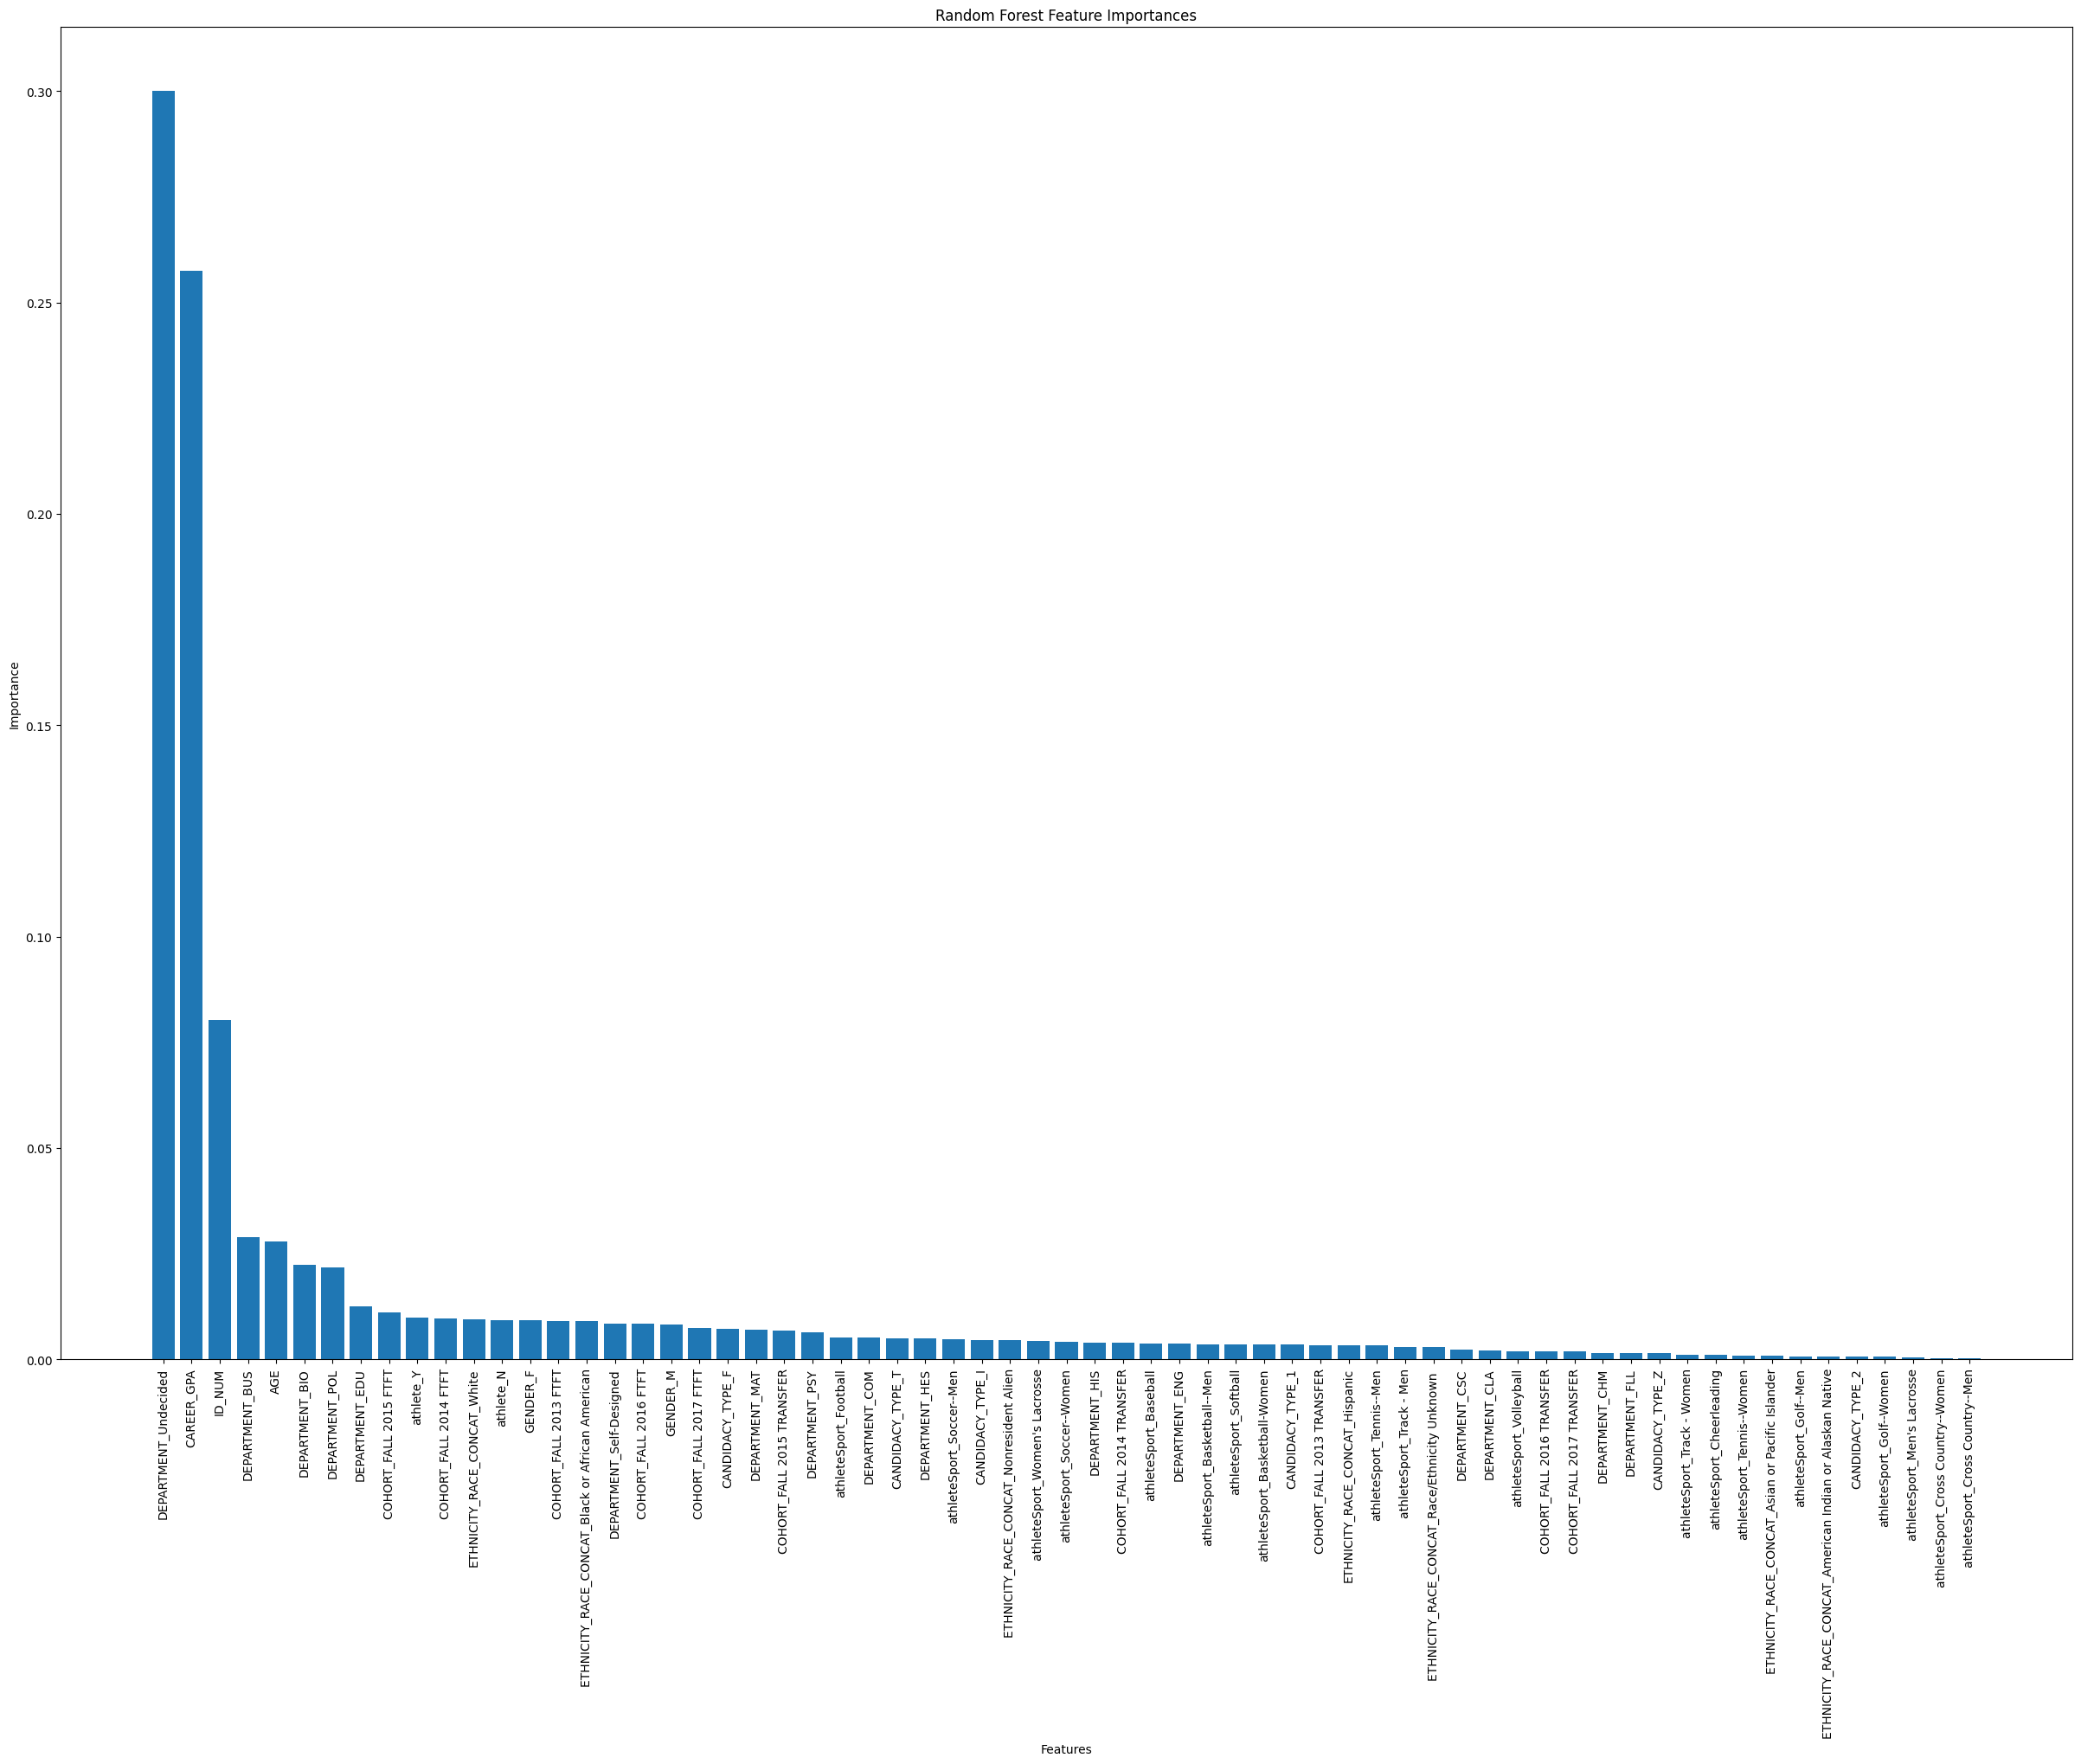

In [29]:
#  feature importances from the trained model
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(30, 20))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingClassifier


# Create and train gradient boosting classifier modell
GBC_model = GradientBoostingClassifier(random_state=42)
GBC_model.fit(X_train, y_train)
y_pred = GBC_model.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)


Accuracy: 0.8858

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86       166
           1       0.87      0.95      0.91       228

    accuracy                           0.89       394
   macro avg       0.89      0.87      0.88       394
weighted avg       0.89      0.89      0.88       394



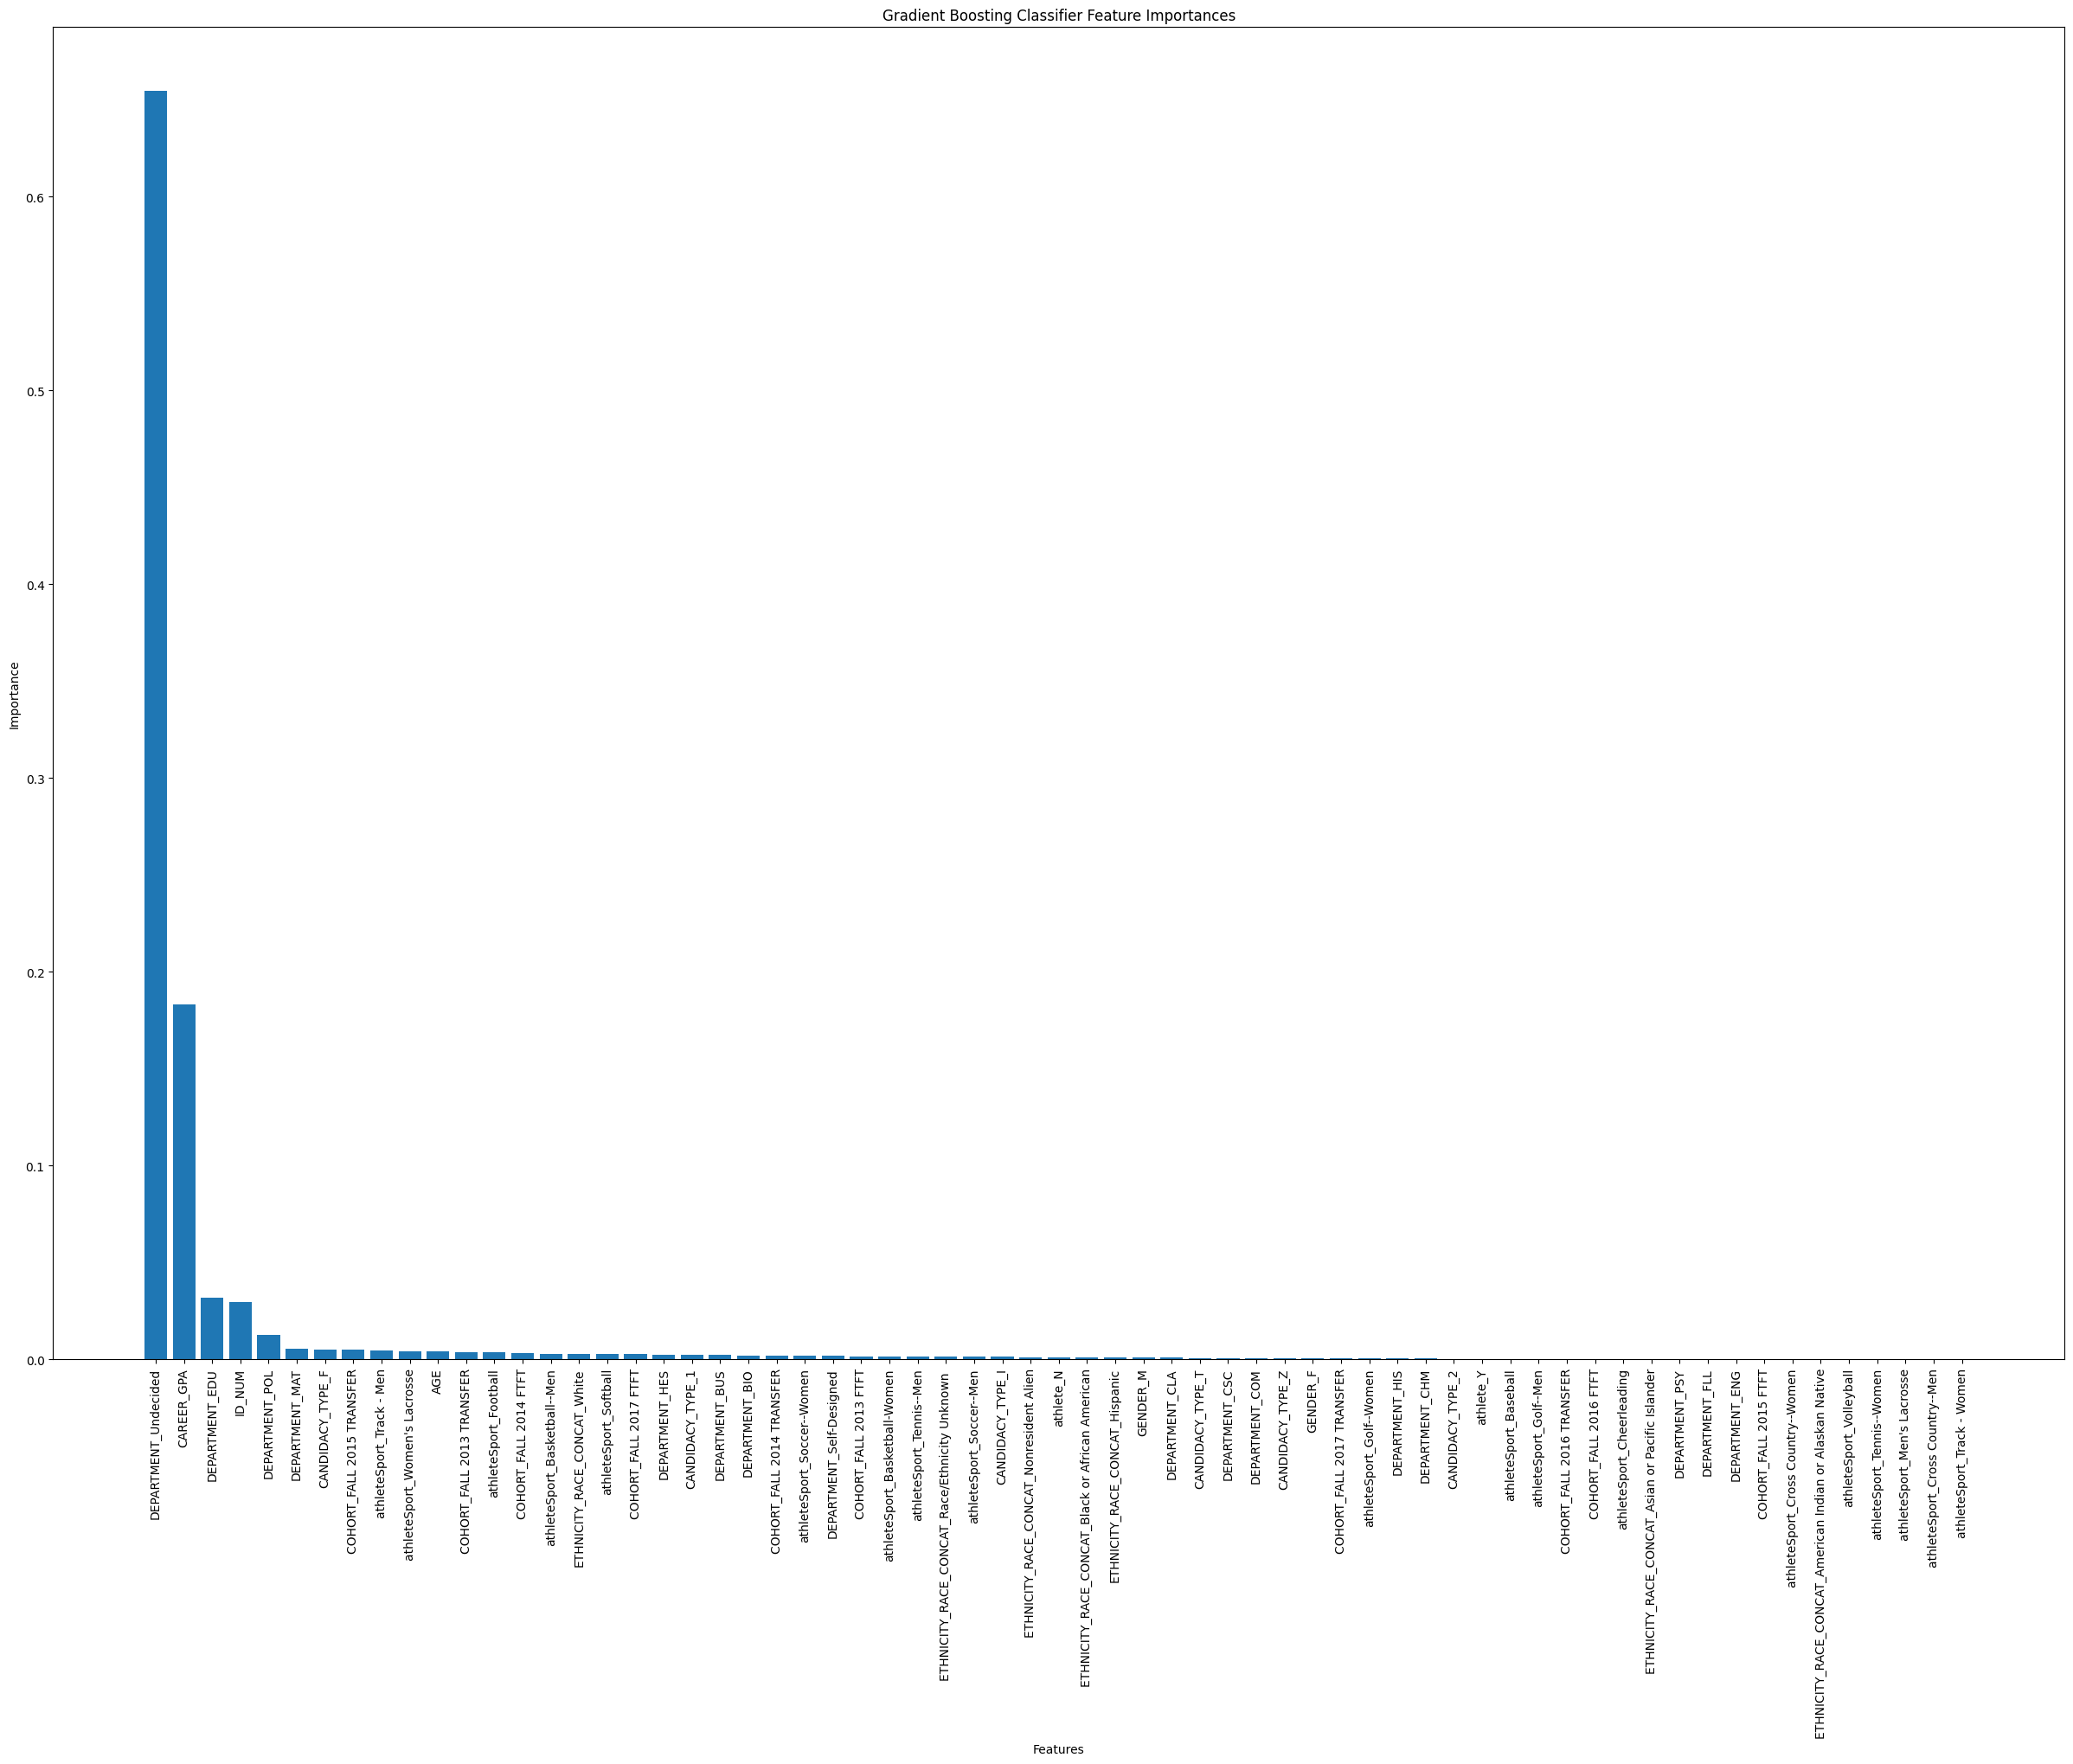

In [28]:
# Get feature importances from the trained model
feature_importances = GBC_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(30, 20))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Gradient Boosting Classifier Feature Importances')
plt.show()

predictive models - GPA groups target

In [48]:
df_model2=df[['AGE','GENDER','DEPARTMENT','COHORT','CANDIDACY_TYPE','athlete','athleteSport','ETHNICITY_RACE_CONCAT']]
print(df_model2)

       AGE GENDER DEPARTMENT              COHORT CANDIDACY_TYPE athlete  \
0     18.0      M        BUS      FALL 2013 FTFT              F       N   
1     18.0      F        BIO      FALL 2013 FTFT              F       Y   
2     18.0      M        EDU      FALL 2013 FTFT              F       N   
3     18.0      M  Undecided      FALL 2013 FTFT              F       Y   
4     19.0      M        BIO      FALL 2013 FTFT              F       N   
...    ...    ...        ...                 ...            ...     ...   
1309  21.0      F        BIO  FALL 2017 TRANSFER              T       Y   
1310  23.0      M  Undecided  FALL 2017 TRANSFER              T       Y   
1311  23.0      M  Undecided  FALL 2017 TRANSFER              T       N   
1312  21.0      F        BUS  FALL 2017 TRANSFER              T       Y   
1313  24.0      F        POL  FALL 2017 TRANSFER              T       N   

          athleteSport      ETHNICITY_RACE_CONCAT  
0                  NaN                      Whi

In [60]:
df_dum2=pd.get_dummies(df_model2)
print(df_dum2)

       AGE  GENDER_F  GENDER_M  DEPARTMENT_BIO  DEPARTMENT_BUS  \
0     18.0         0         1               0               1   
1     18.0         1         0               1               0   
2     18.0         0         1               0               0   
3     18.0         0         1               0               0   
4     19.0         0         1               1               0   
...    ...       ...       ...             ...             ...   
1309  21.0         1         0               1               0   
1310  23.0         0         1               0               0   
1311  23.0         0         1               0               0   
1312  21.0         1         0               0               1   
1313  24.0         1         0               0               0   

      DEPARTMENT_CHM  DEPARTMENT_CLA  DEPARTMENT_COM  DEPARTMENT_CSC  \
0                  0               0               0               0   
1                  0               0               0           

In [50]:
#TRAIN TEST SPLIT
X=df_dum2
y=df.GPA_GROUP.values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
#random forest
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.3452

Classification Report:
                   precision    recall  f1-score   support

 0.00 - 2.50 GPA       0.57      0.53      0.55       116
  2.50 -3.00 GPA       0.12      0.08      0.10        73
 3.00 - 3.60 GPA       0.35      0.45      0.40       115
3.60 - 3.80 GPA        0.04      0.03      0.03        38
 3.80 - 4.00 GPA       0.25      0.31      0.28        48
           4.00+       0.00      0.00      0.00         4

        accuracy                           0.35       394
       macro avg       0.22      0.23      0.23       394
    weighted avg       0.33      0.35      0.33       394



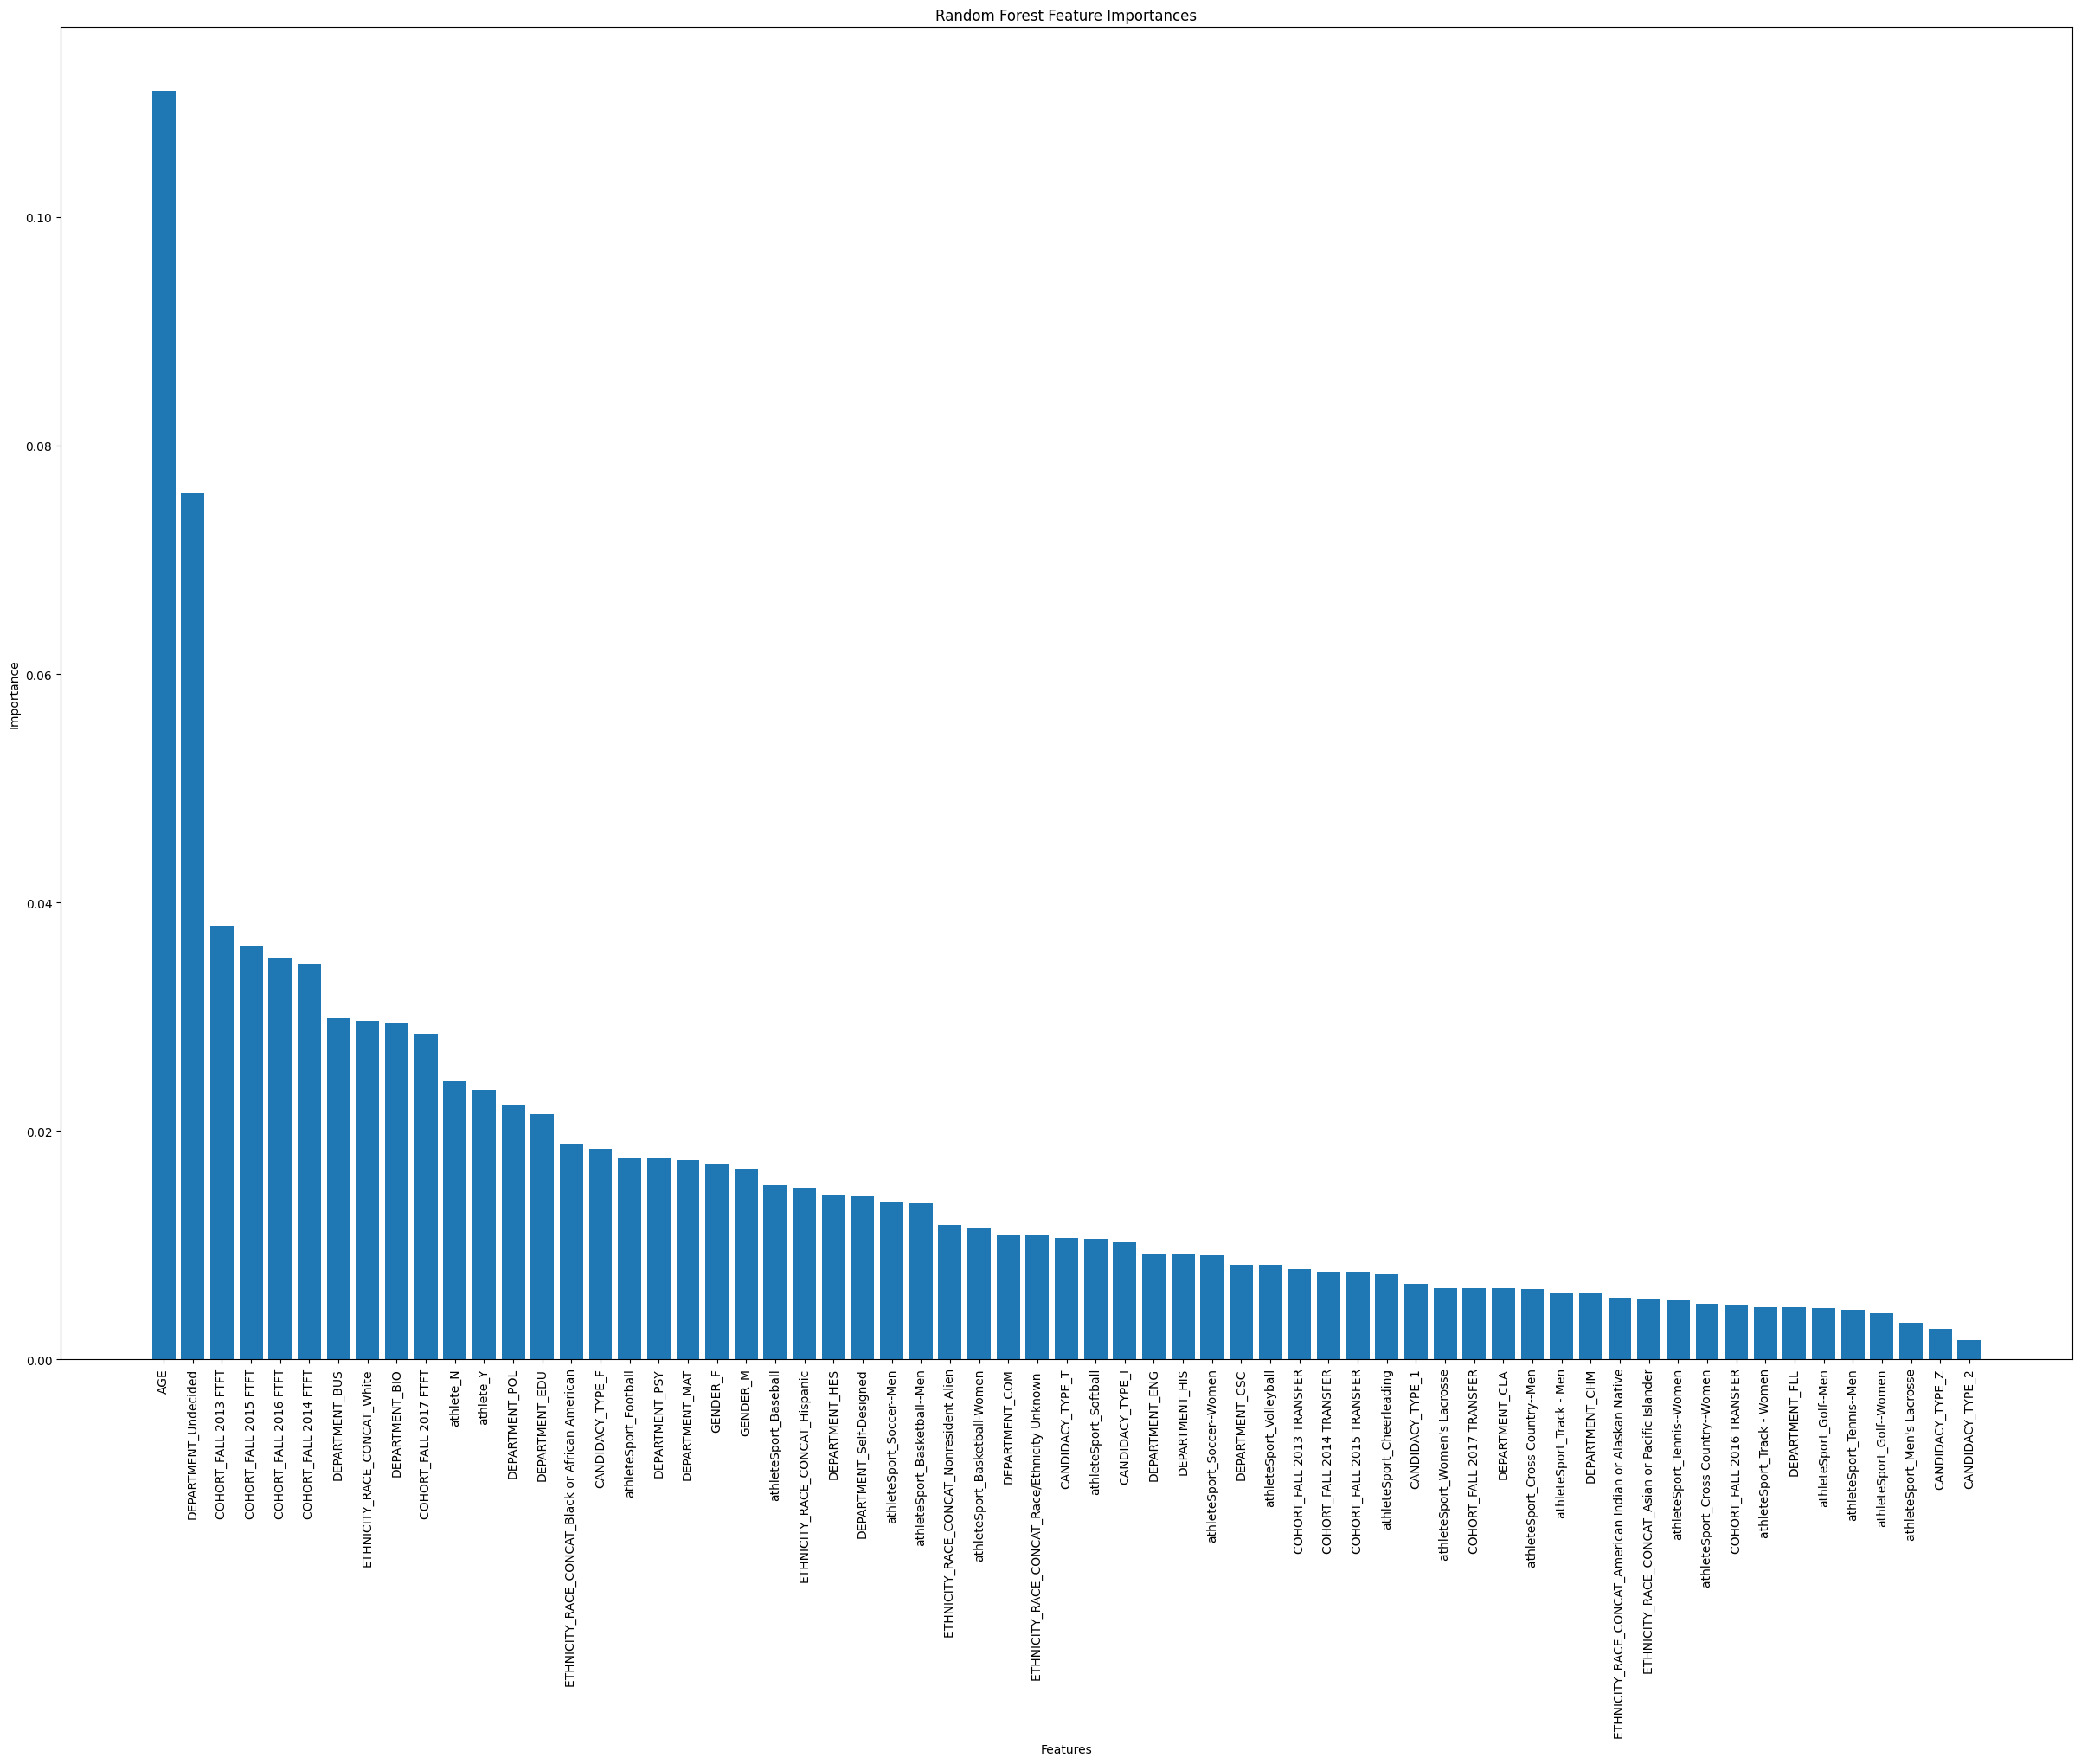

In [53]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(30, 20))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [54]:
#Create and train the Gradient Booster Classifier model
GBC_model = GradientBoostingClassifier(random_state=42)
GBC_model.fit(X_train, y_train)
y_pred = GBC_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.4061

Classification Report:
                   precision    recall  f1-score   support

 0.00 - 2.50 GPA       0.61      0.63      0.62       116
  2.50 -3.00 GPA       0.22      0.08      0.12        73
 3.00 - 3.60 GPA       0.37      0.59      0.45       115
3.60 - 3.80 GPA        0.26      0.13      0.18        38
 3.80 - 4.00 GPA       0.19      0.17      0.18        48
           4.00+       0.00      0.00      0.00         4

        accuracy                           0.41       394
       macro avg       0.28      0.27      0.26       394
    weighted avg       0.38      0.41      0.38       394



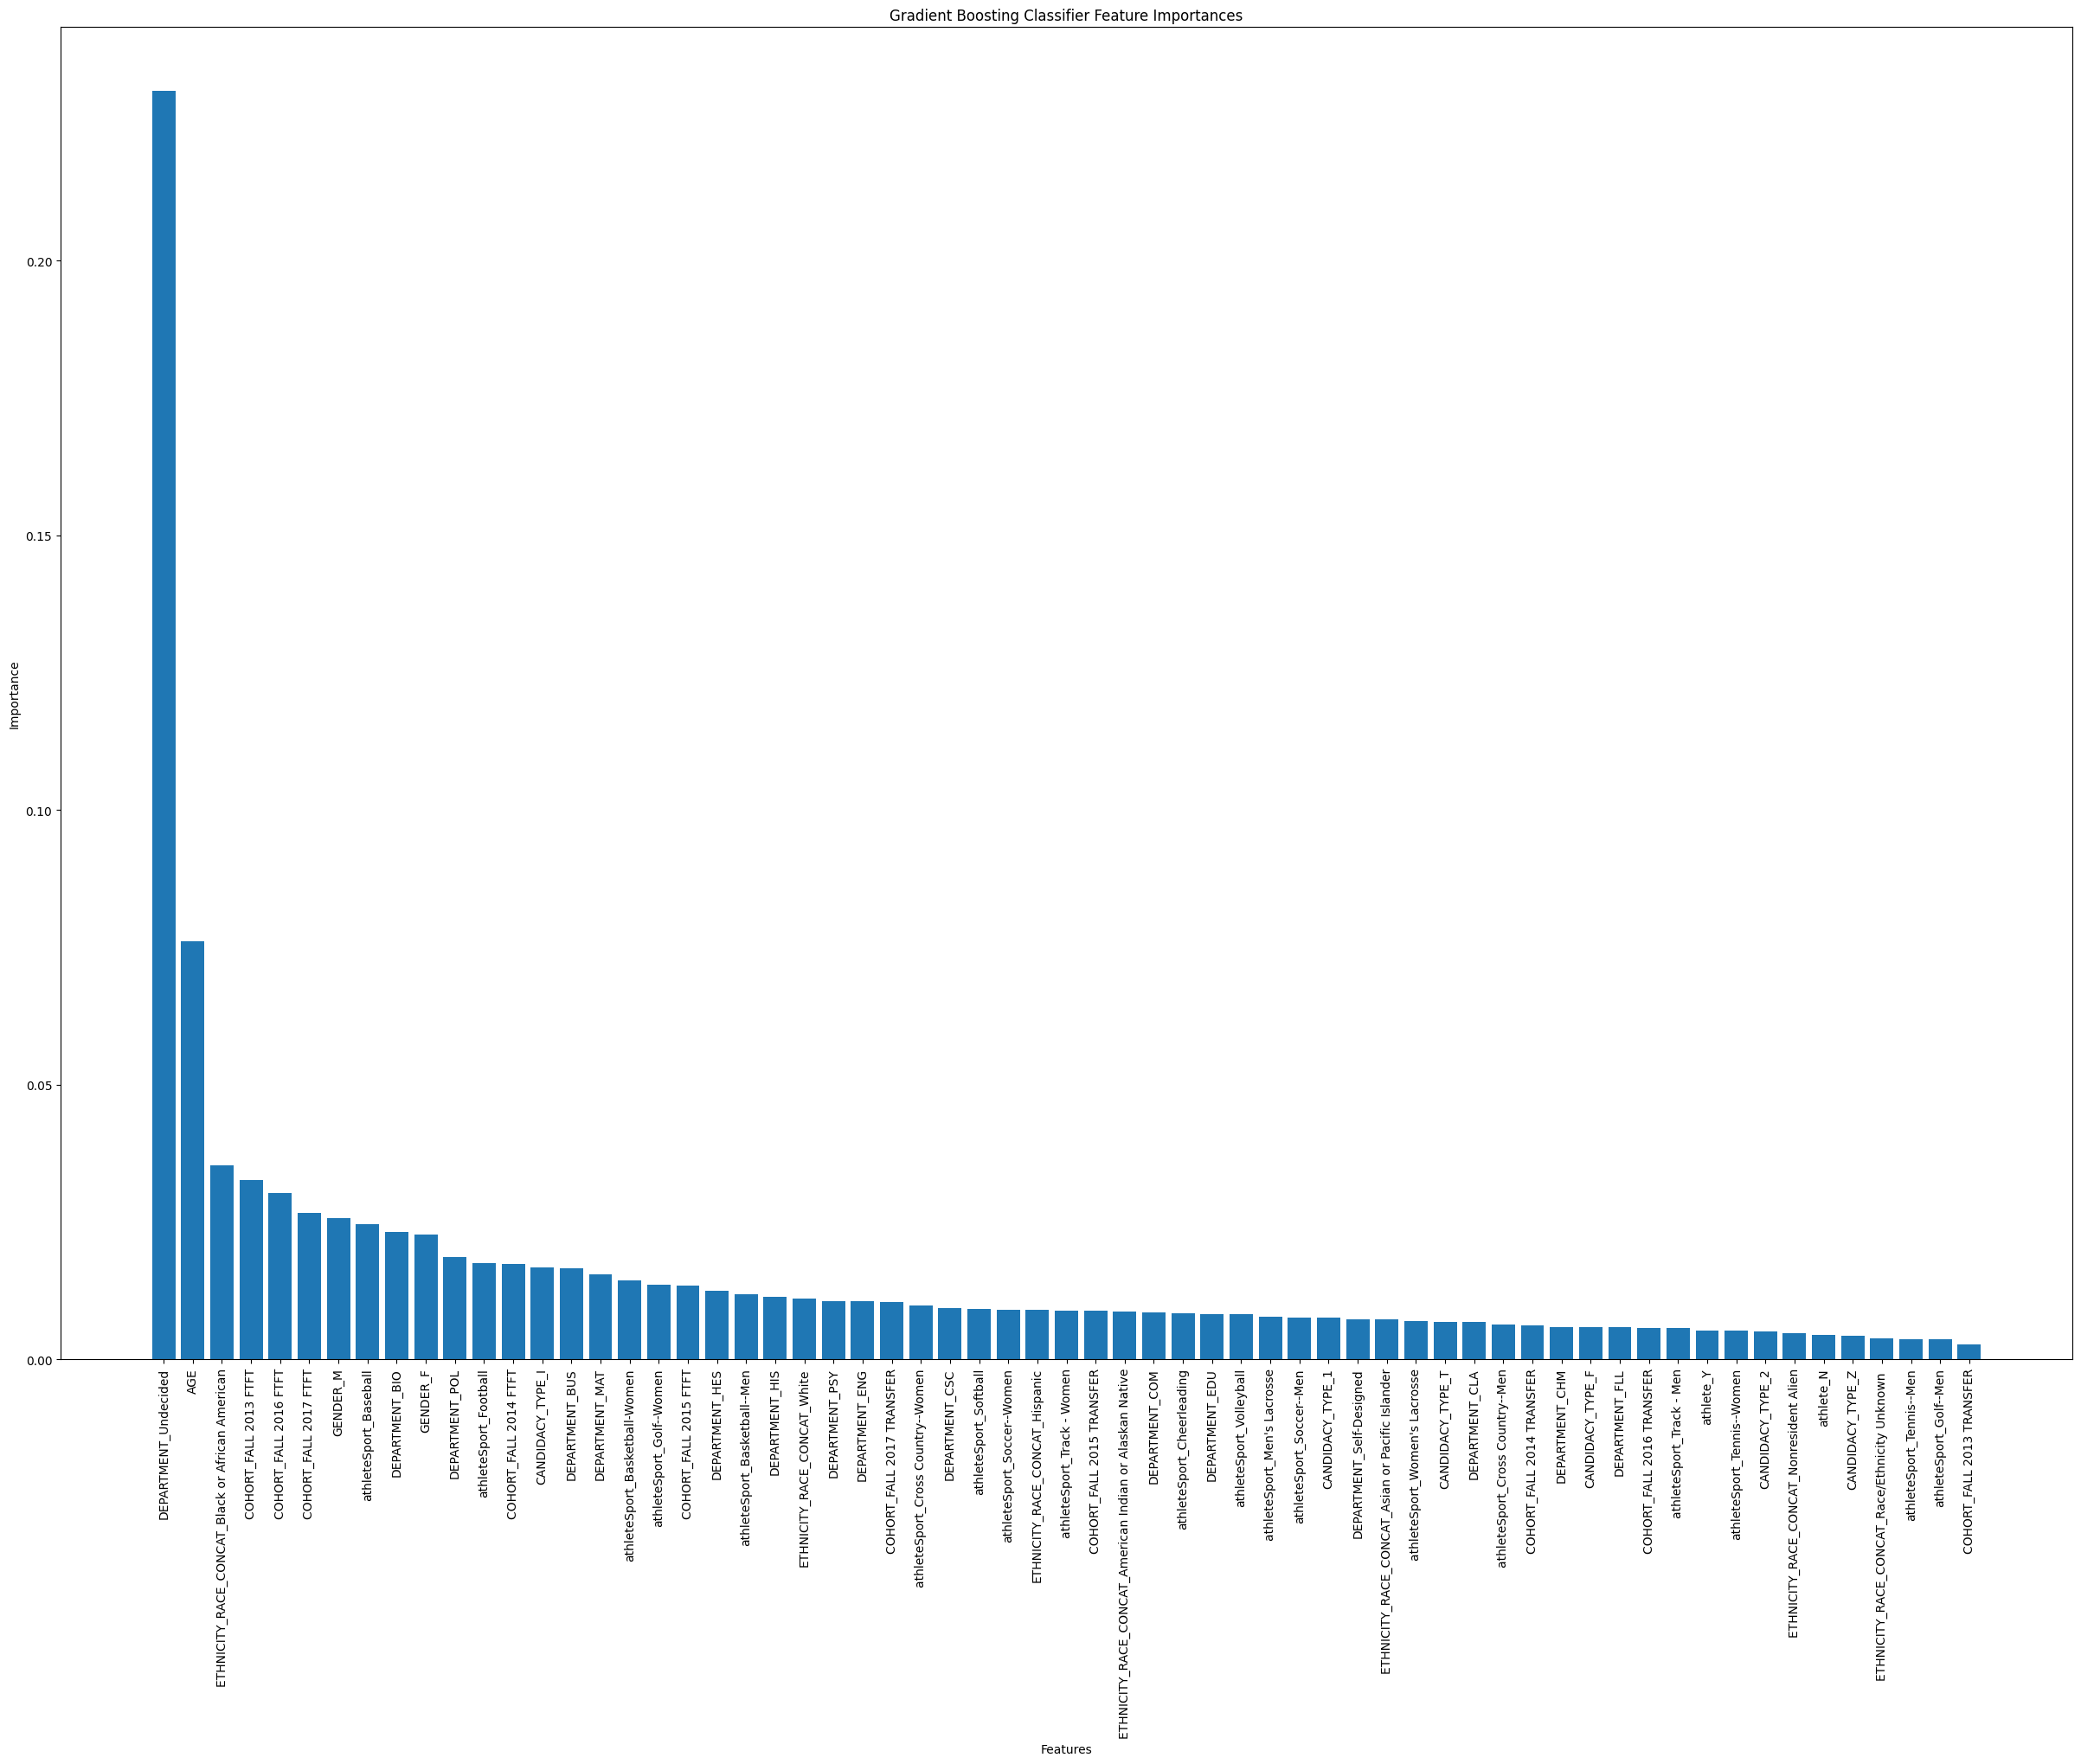

In [55]:
# Get feature importances from the trained model
feature_importances = GBC_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(30, 20))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Gradient Boosting Classifier Feature Importances')
plt.show()